<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Fresnel-based DOE Stokes analyzer </font>
</div>

- **Fecha**: 2022/03/15
        
- **Autores**: 
    - Javier Alda
    - Luis Miguel Sánchez Brea

   
- **Estado**:  Funciona, se valida la prueba de concepto (**guardar**). 

- **Objetivos**: 
    - Desarrollo teórico. Prueba de concepto.
    - Creación de una  SFZP (sectorized Fresnel Zone Plate) polarizante para obtener los vectores de Stokes de un punto de vista experimental.
   

- **Descripción** 
     - Prueba de concepto de creación de una máscara formada por una SFZP (sectorized Fresnel Zone Plate) para obtener los vectores de Stokes. 
     - Se divide un espacio circular en varias secciones, En cada una de ellas se coloca una lente ligeramente desplazada del centro. A cada uno de los sectores, además del SFZP, se coloca un polarizador.
     - Una vez generada la máscara vectorial, se realizan diversas pruebas con fuentes de luz polarizadas. Se demuestra que se obtienen intensidades de luz en cada foco directamente relacionados con el estado de polarización.
     - Se ubican fotodetectores y se integran las señales.

- **Referencias**: Based on diffractio py module

- **Conclusiones**: 
    - Los resultados salen. 
    - Aquí utilizamos estados de polarización puros (polarizador lineal y polarizador circular). Es necesario sustituir el estado de polarizador circular (no fabricable fácilmente) por otro estado más fabricable (lámina $\lambda$/4 + Polarizador lineal.
    - Hay que pensar un procedimiento de fabricación:
        1. Máscara de amplitud + polarizadores recortados
        2. SLM. En este caso nos tenemos que adaptar a los polarizadores que nos proporciona el SLM.



# Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import diffractio
import matplotlib as mpl

from diffractio import degrees, mm, plt, sp, um, np, nm

In [3]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.stokes import Stokes

d:\codigo\py_pol\py_pol\jones_matrix.py:293: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other._type is 'Jones_vector':
d:\codigo\py_pol\py_pol\jones_matrix.py:1157: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\jones_matrix.py:1373: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\jones_matrix.py:1512: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\jones_matrix.py:1924: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\utils.py:175: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if new_obj._type is 'Jones_vector':
d:\codigo\py_pol\py_pol\utils.py:181: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif new_obj._type is 'Jones_matrix':
d:\codigo\py_pol\py_pol\jones_vector.py:208: SyntaxWarning: "is" wit

In [4]:
from py_aocg.stokes_analyzer.stokes_analyzer_class import (Stokes_analyzer, vectors_standard, Detector,
                                                           diffraction_matrix_standard, fill_sphere_fibonacci, matrices_SLM)

In [5]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [6]:
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.pad_inches']=0.0
mpl.rcParams['figure.subplot.hspace']=0
mpl.rcParams['figure.subplot.wspace']=0
mpl.rcParams['figure.subplot.left']=0.075

### Generation of the Polarization State Analyzer with N fresnel zones

In [7]:
num_sectors = 6
focal = 200 * mm
r_shift = 1.5*mm
detector_radius = 150*um
order=(1,3,5,2,4,6)
order=(1,2,3,4,5,6)


In [8]:
data = np.load("Optimizacion_SLM+PSA_polarimetria.npz")
print(data["indices"])
print(data["cost"])
M_SLM = matrices_SLM(data["indices"])  ## Le falta la matriz de los polarizadores?
Wi_SLM = data["Wi"]


[ 96 163 205   5  52 255]
4.771607317892533


In [9]:
M_SLM[2]

J_picked = 
[+0.533-0.000j -0.325+0.130j ]   
[-0.617+0.385j -0.341+0.344j ]   

In [10]:
num_pixels = 512
length = 6*mm

x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um

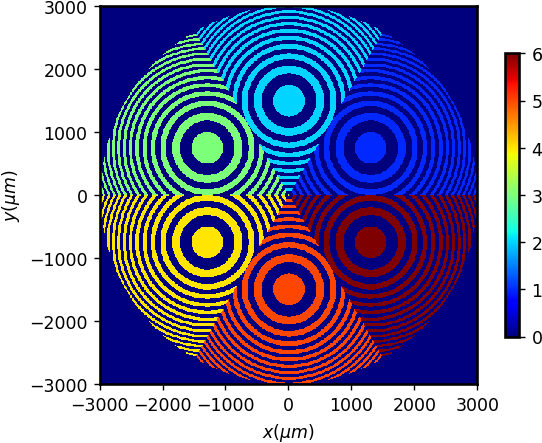

In [11]:
mpl.rcParams['figure.figsize']=(5,4)

stokes_analyzer = Stokes_analyzer(x0, y0, wavelength, num_sectors, focal, r_shift)
stokes_analyzer.order = order
stokes_analyzer.lens_indexes(order, has_draw=True)
stokes_analyzer.Wi = Wi_SLM

In [12]:
stokes_analyzer.lens_vector(jones_matrices=M_SLM, has_draw=True)

d:\codigo\py_pol\py_pol\jones_matrix.py:293: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other._type is 'Jones_vector':
d:\codigo\py_pol\py_pol\jones_matrix.py:1157: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\jones_matrix.py:1373: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\jones_matrix.py:1512: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\jones_matrix.py:1924: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\jones_matrix.py:293: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other._type is 'Jones_vector':
d:\codigo\py_pol\py_pol\jones_matrix.py:1157: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:
d:\codigo\py_pol\py_pol\jones_matrix.py:1373: SyntaxWarning: "i

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
detector_1 = Detector(x0, y0, wavelength,num_sectors, r_shift, order)
detector_1.circular(detector_radius)
stokes_analyzer.set_detector(detector_1, True)

In [ ]:
stokes_analyzer.order

In [ ]:
diffraction_matrix= stokes_analyzer.get_diffraction_matrix(vectors_standard, has_draw=True)

In [ ]:
diffraction_matrix

In [ ]:
diffraction_matrix.sum(axis=0)

In [ ]:
diffraction_matrix.sum(axis=1)

In [ ]:
np.savez("diffraction_matrix_512_test.npz", diffraction_matrix=diffraction_matrix)

In [ ]:
Signals, Stokes_results, Errors = stokes_analyzer.compute_stokes_several(vectors_standard,
                               z_obs=focal,
                               u=1,
                               Wi = Wi_SLM,                            
                               diffraction_matrix=diffraction_matrix_standard,
                               filter=True,
                               has_draw=False)

In [ ]:
Signals, Stokes_results, Errors = stokes_analyzer.compute_stokes_several(vectors_standard,
                               z_obs=focal,
                               u=1, 
                               Wi = Wi_SLM,                            
                               diffraction_matrix=diffraction_matrix,
                               filter=True,
                               has_draw=False)

In [ ]:
j_input=(1,1)

intensidad_z, J_out_z = stokes_analyzer.compute_intensity(j_input,
                          z_obs=focal,
                          u=1,
                          has_draw=True,
                          )
plt.text(-1.55*r_shift,1.35*r_shift,'(1,1,0,0)', fontsize=16, color='white')

In [ ]:
stokes_result, signals, error = stokes_analyzer.compute_stokes(
                          intensidad_z, diffraction_matrix=diffraction_matrix, Wi=Wi_SLM, filter=True, j0=j_input)

In [ ]:
stokes_result, error, signals

# Esfera

In [ ]:
x,y,z, Jones_regular=fill_sphere_fibonacci(num_samples=75, kind_exit='Jones')

In [ ]:
Signals, Stokes_results, Errors = stokes_analyzer.compute_stokes_several(Jones_regular,
                               z_obs=focal,
                               u=1,
                               Wi=Wi_SLM, 
                               diffraction_matrix=diffraction_matrix,
                               filter=False,
                               has_draw=False)

In [ ]:
Errors.max(), Errors.min()

In [ ]:
S = Stokes("Error").from_components([np.ones_like(x),x,y,z])
fig = S.draw_poincare(kind="surf", param=Errors)
fig.show()

In [ ]:
SAVE_ERROR=True
if SAVE_ERROR:
    np.savez("error_esfera_SLM.npz", x=x, y=y, z=z, Errors=Errors)

# Representación desde datos directamente

In [ ]:
data=np.load("error_esfera_SLM.npz")

In [ ]:
x = data['x']
y = data['y']
z = data['z']
Errors = data['Errors']


In [ ]:
S = Stokes("Error").from_components([np.ones_like(x),x,y,z])
fig = S.draw_poincare(kind="surf", param=Errors)
fig.show()